In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import os
import cv2  

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [4]:
data=pd.read_csv('train.csv')

In [5]:
#copied_path='/content/drive/My Drive/9z_ML_Bootcamp/Kannada_MINST/train.csv'
#data=pd.read_csv(copied_path)


In [6]:
X_data= data.values[:6000, 1:]/255
y_label=data.values[:6000, 0]
n_classes=10  
y_label = to_categorical(y_label, n_classes)

from sklearn.model_selection import train_test_split
X_train_pre_process, X_test_pre_process, y_train_pre_process, y_test_pre_process = train_test_split(X_data, y_label ,test_size=0.2, random_state=42)


In [7]:
print(X_test_pre_process.shape)
print(X_train_pre_process.shape)
print(y_train_pre_process.shape)
print(y_test_pre_process.shape)

(1200, 784)
(4800, 784)
(4800, 10)
(1200, 10)


(3, 784)


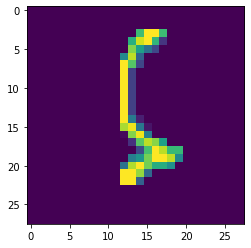

In [8]:
X_train_pre_process1=X_train_pre_process[1:4]
print(X_train_pre_process1.shape)
plt.imshow(X_train_pre_process1[2].reshape(28,28))

In [9]:
def gray_rgb(X_data):
    X=[]

    for i in range(X_data.shape[0]):
        X_temp=X_data[i,:].reshape(28,28,1)
        X.append(np.concatenate((X_temp,X_temp,X_temp),axis=-1)) # Note cannot do reshape 28x28x1 then conver RGB. The channel 1 has some offset. 

        #X.append(np.concatenate((X_temp_resize,X_temp_resize,X_temp_resize),axis=-1))
        X_temp_resize= tf.image.resize(X, [94,94])
    return X_temp_resize

(3, 94, 94, 3)

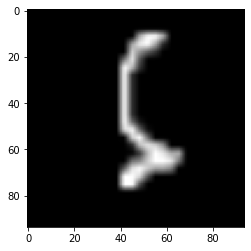

In [10]:
X_train=np.asarray(gray_rgb(X_train_pre_process1))
tt=plt.imshow(X_train[2])
X_train.shape

In [11]:
X_train_rgb=np.asarray(gray_rgb(X_train_pre_process))

In [12]:
X_test_rgb=np.asarray(gray_rgb(X_test_pre_process))

y_train_rgb=y_train_pre_process
y_test_rgb=y_test_pre_process

(4800, 94, 94, 3)
(4800, 10)
(1200, 94, 94, 3)
(1200, 10)
(4800, 784)
(4800, 10)
(4800, 28, 28, 1)


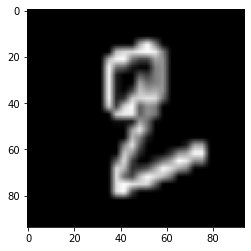

In [13]:
tt=plt.imshow(X_train_rgb[34])
print(X_train_rgb.shape)
print(y_train_rgb.shape)
print(X_test_rgb.shape)
print(y_test_rgb.shape)
print(X_train_pre_process.shape)

print(y_train_pre_process.shape)


X_train1 = X_train_pre_process.reshape((X_train_pre_process.shape[0], 28, 28, 1))
print(X_train1.shape)

In [14]:
def data_augment(X_train,y_train, batch_size):
    from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation

    datagen = ImageDataGenerator(zoom_range=0.1,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 rotation_range=5)
    datagen.fit(X_train)
    train_generator=datagen.flow(X_train, y_train, batch_size=16, shuffle=True)
    i=0
    for img_batch in train_generator:
        x,y=img_batch
        X_train=np.concatenate((X_train,x), axis=0)
        y_train=np.concatenate((y_train,y), axis=0)
        i=i+1    
        if i >= batch_size:
            break
    return X_train, y_train

In [15]:
X_train, y_train=data_augment(X_train_rgb, y_train_rgb,20)
X_test=X_test_rgb
y_test=y_test_rgb

In [16]:
print(X_train_pre_process.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4800, 784)
(5120, 94, 94, 3)
(1200, 94, 94, 3)
(5120, 10)
(1200, 10)


In [17]:
base_model=tf.keras.applications.MobileNetV2(
    input_shape=(94,94,3), alpha=1.0, include_top=False, weights='imagenet',
    input_tensor=None, pooling=None)
base_model.trainable=False # parameter term

D:\Softwares\anaconda1\envs\jiuzhang\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [18]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
c=model.fit(x=X_train, y=y_train,epochs=30,batch_size=32, validation_data=(X_test,y_test), shuffle=True)

Train on 5120 samples, validate on 1200 samples
Epoch 1/30
5120/5120 [==============================] - 17s 3ms/sample - loss: 1.1606 - accuracy: 0.6211 - val_loss: 4.5167 - val_accuracy: 0.1275
Epoch 2/30
5120/5120 [==============================] - 8s 2ms/sample - loss: 0.5574 - accuracy: 0.8273 - val_loss: 7.3387 - val_accuracy: 0.0975
Epoch 3/30
5120/5120 [==============================] - 8s 2ms/sample - loss: 0.4387 - accuracy: 0.8600 - val_loss: 6.9422 - val_accuracy: 0.0983
Epoch 4/30
5120/5120 [==============================] - 8s 2ms/sample - loss: 0.3886 - accuracy: 0.8783 - val_loss: 7.2833 - val_accuracy: 0.0975
Epoch 5/30
5120/5120 [==============================] - 8s 2ms/sample - loss: 0.3412 - accuracy: 0.8898 - val_loss: 8.1346 - val_accuracy: 0.0983
Epoch 6/30
5120/5120 [==============================] - 8s 2ms/sample - loss: 0.3170 - accuracy: 0.8982 - val_loss: 5.5614 - val_accuracy: 0.1225
Epoch 7/30
5120/5120 [==============================] - 8s 2ms/sample - los

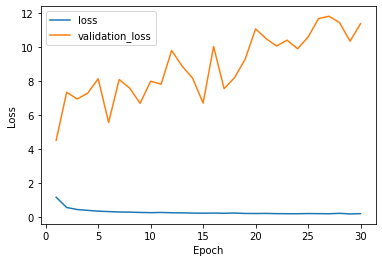

In [21]:
loss = c.history['loss']
val_loss = c.history['val_loss']

len(loss)

train_epoch=range(1,31)
plt.plot(train_epoch,loss, label='loss')
plt.plot(train_epoch,val_loss, label='validation_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 

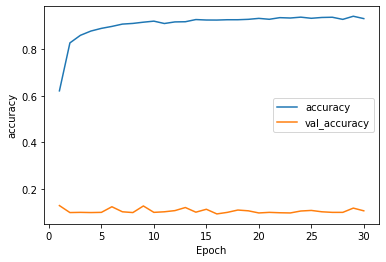

In [22]:
accuracy  = c.history['accuracy']
val_accuracy = c.history['val_accuracy']



train_epoch=range(1,31)
plt.plot(train_epoch,accuracy , label='accuracy')
plt.plot(train_epoch,val_accuracy , label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

text=('best accuracy' ,max(val_accuracy),)

In [23]:
model.summary() # still need fine tune

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 3, 3, 1280)        2257984   
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 1280)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
base_model.trainable=True

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [ ]:
fine_tune_layer=120
for layer in base_model.layers[:fine_tune_layer]:
  layer.trainable=False

  #Freeze the bottom layer


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])
epoch_fine=10
model.summary()
print(len(model.trainable_variables))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 3, 3, 1280)        2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 1280)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 1,637,706
Non-trainable params: 633,088
_________________________________________________________________
38


In [ ]:
c_fine=model.fit(x=X_train, y=y_train,epochs=epoch_fine, batch_size=32, validation_data=(X_test,y_test), shuffle=True)

Epoch 1/10
35/35 [==============================] - 1s 29ms/step - loss: 0.7048 - accuracy: 0.5205 - val_loss: 0.6610 - val_accuracy: 0.9700
Epoch 2/10
35/35 [==============================] - 0s 10ms/step - loss: 0.6905 - accuracy: 0.6920 - val_loss: 0.6622 - val_accuracy: 0.9500
Epoch 3/10
35/35 [==============================] - 0s 10ms/step - loss: 0.6825 - accuracy: 0.7714 - val_loss: 0.6632 - val_accuracy: 0.9350
Epoch 4/10
35/35 [==============================] - 0s 10ms/step - loss: 0.6767 - accuracy: 0.8250 - val_loss: 0.6642 - val_accuracy: 0.9350
Epoch 5/10
35/35 [==============================] - 0s 10ms/step - loss: 0.6722 - accuracy: 0.8741 - val_loss: 0.6645 - val_accuracy: 0.9300
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.9045 - val_loss: 0.6653 - val_accuracy: 0.9150
Epoch 7/10
35/35 [==============================] - 0s 10ms/step - loss: 0.6657 - accuracy: 0.9250 - val_loss: 0.6668 - val_accuracy: 0.8950
Epoch 8/10
35/

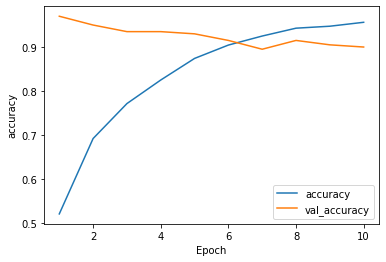

In [ ]:
accuracy  = c_fine.history['accuracy']
val_accuracy = c_fine.history['val_accuracy']



train_epoch=range(1,11)
plt.plot(train_epoch,accuracy , label='accuracy')
plt.plot(train_epoch,val_accuracy , label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()

text=('best accuracy' ,max(val_accuracy))